# NEURAL NETWORKS!

Finally, its time to take over the world.

References:
* User's Guide - http://scikit-learn.org/stable/modules/neural_networks_supervised.html
* API - http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

***
In this example, I will generate and load some datasets to explore what happens when we vary the number of hidden nodes and layers.
Pay attention to how the shape of the decision boundary becomes more complex.

# Input Data



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
# Generate a few datasets to play with
# have to make some modifications to get 2 classes
Xcircle, ycircle = datasets.make_circles()

num_clust = 20
Xclust,yclust = datasets.make_blobs(n_samples=10*num_clust,centers=num_clust,random_state=42)
yclust = np.floor_divide(yclust,num_clust/2) # default is one class per blob, this changes it to 2 classes

Xmoons, ymoons = datasets.make_moons()

Xblobs, yblobs = datasets.make_blobs(n_samples=100,centers=2,random_state=42,cluster_std=4)
                                 
# listify 
Xdata = (Xblobs,Xclust,Xmoons,Xcircle)
ydata = (yblobs,yclust,ymoons,ycircle)

In [3]:
# Helper functions stolen from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

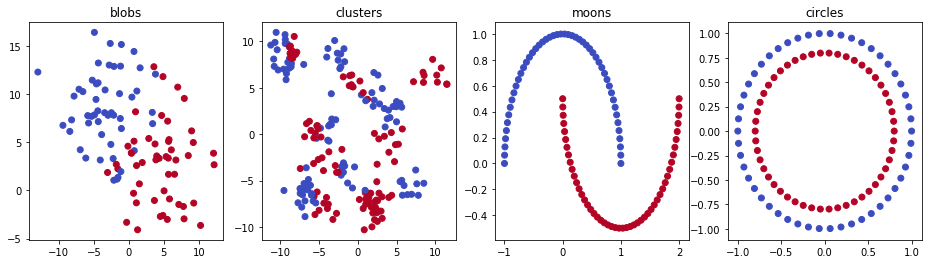

In [4]:
plt.figure(figsize=(16,4))

titles = ('blobs','clusters','moons','circles')
for i,(X,y,title) in enumerate(zip(Xdata,ydata,titles)):
    plt.subplot(1,4,i+1)
    X0 = X[:,0]
    X1 = X[:,1]
    plt.scatter(X0, X1,c=y,cmap='coolwarm')
    plt.title(title)
     
plt.show()

*** 
# Using Neural Networks

In [249]:
from sklearn import neural_network

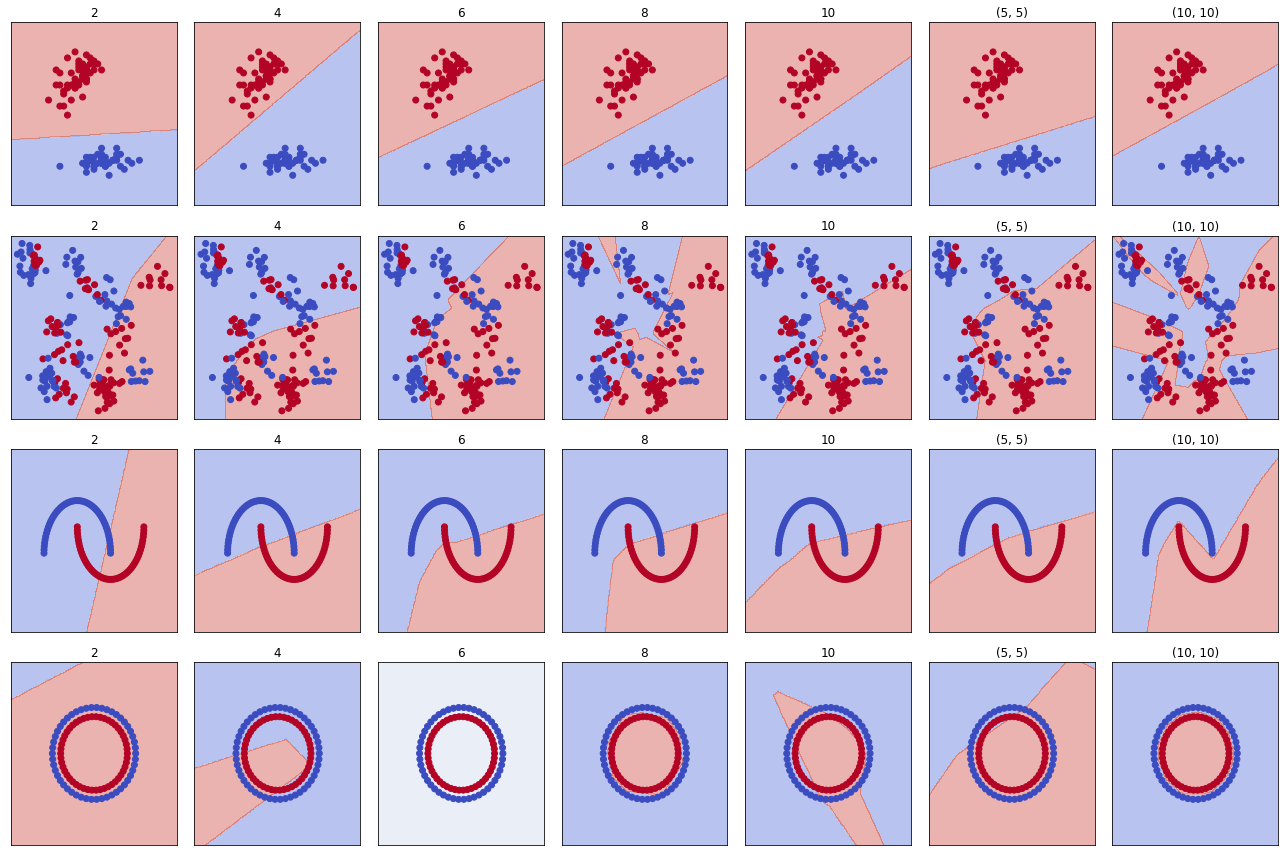

In [253]:
hiddens = ((2),(4),(6),(8),(10),(5,5),(10,10))  # list of hidden layers/nodes to try

plt.figure(figsize=(18,12))


for i,(X,y) in enumerate(zip(Xdata,ydata)):
    X0 = X[:,0]
    X1 = X[:,1]
    xx, yy = make_meshgrid(X0, X1)
    
    for j,hidden in enumerate(hiddens):
        ax = plt.subplot(len(Xdata),len(hiddens),len(hiddens)*i+1+j)
        ax.set_title(hidden)
        ax.set_xticks(())
        ax.set_yticks(())
        clf = neural_network.MLPClassifier(hidden_layer_sizes=hidden,max_iter=10000,random_state=42)
        clf.fit(X,y)
        plot_contours(ax,clf,xx,yy,cmap='coolwarm',alpha=0.4)
        plt.scatter(X0, X1, c=y,cmap='coolwarm')

plt.tight_layout()
plt.show()